# Comparison notebook
This notebook takes the csv files generated after data handling of the FPGA simulation data and the Python simulation data

Saved plot: Plots/AND_gata_comparisonA=0,_B=0_(I0=1).png


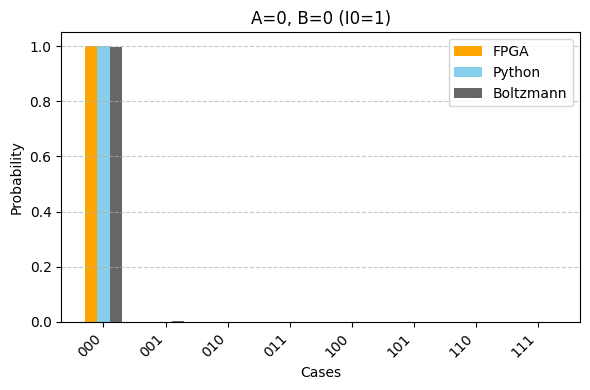

Saved plot: Plots/AND_gata_comparisonA=0,_B=1_(I0=1).png


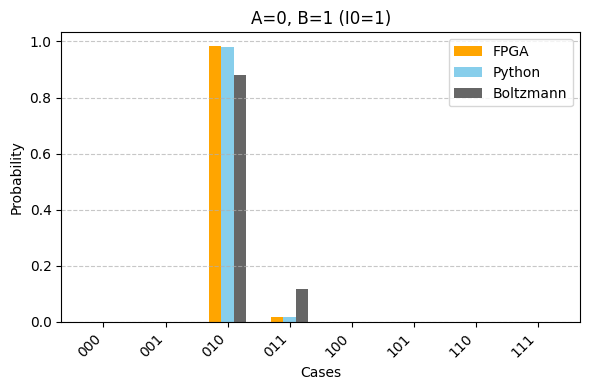

Saved plot: Plots/AND_gata_comparisonA=1,_B=0_(I0=1).png


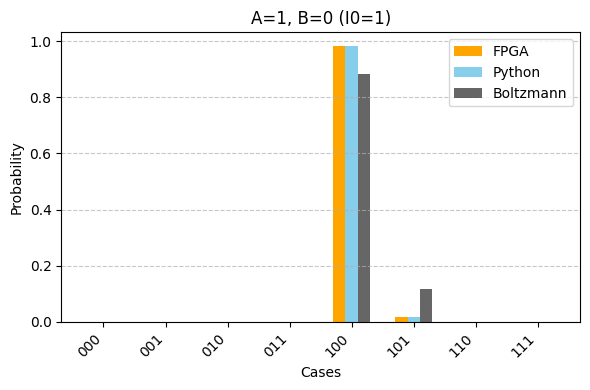

Saved plot: Plots/AND_gata_comparisonA=1,_B=1_(I0=1).png


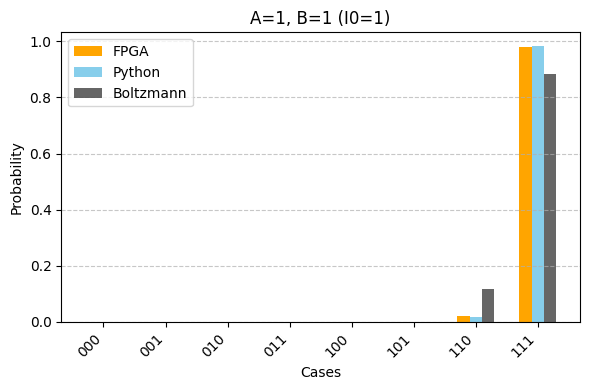

Saved plot: Plots/AND_gata_comparisonC=0_(I0=1).png


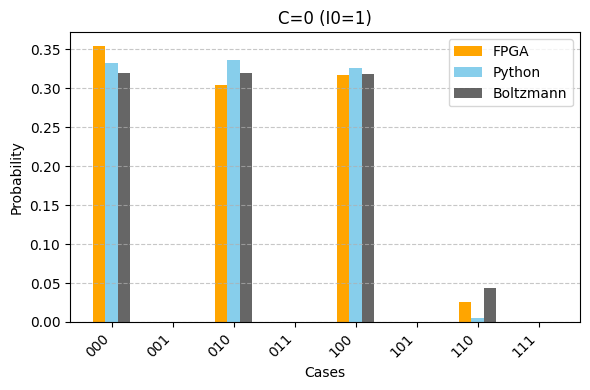

Saved plot: Plots/AND_gata_comparisonC=1_(I0=1).png


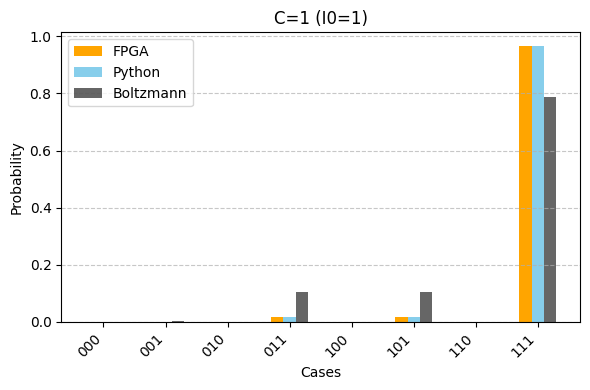

Saved plot: Plots/AND_gata_comparisonFloating_State_(I0=1).png


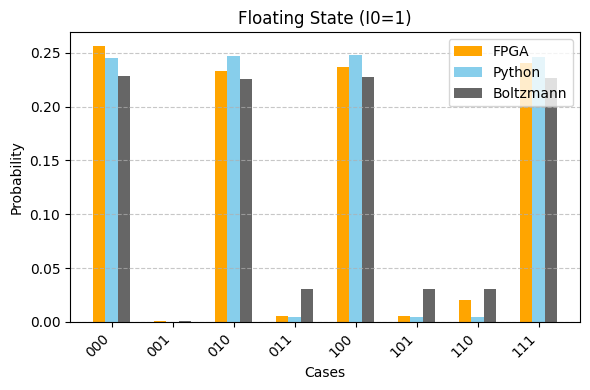

Saved plot: Plots/AND_gata_comparisonUnconstrained_(I0=0).png


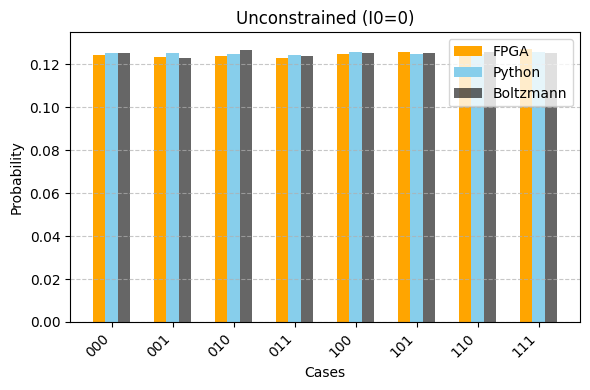

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def comparison(file_path_FPGA,file_path_Python_Boltzmann, savefig=False):
    # Load data
    data_FPGA = pd.read_csv(file_path_FPGA, low_memory=False,dtype={'case':str})
    data_Python_Boltzmann = pd.read_csv(file_path_Python_Boltzmann, low_memory=False,dtype={'case':str})

    # Strip whitespace from column names
    data_FPGA.columns = data_FPGA.columns.str.strip()
    data_Python_Boltzmann.columns = data_Python_Boltzmann.columns.str.strip()

    # Merge based on both 'label' and 'case' columns
    merged_df = pd.merge(data_FPGA, data_Python_Boltzmann, on=['label', 'case'])

    # Get unique labels
    unique_labels = merged_df["label"].unique()

    # Iterate through each label and create a separate plot
    for label in unique_labels:
        # Filter data for the current label
        subset = merged_df[merged_df["label"] == label].sort_values(by="case")

        # Extract values
        cases = subset["case"]
        data_fpga = subset["normalized_count_FPGA"]
        data_python = subset["normalized_counts_Python"]
        data_boltzmann = subset["normalized_counts_Boltzmann"]

        # Define x locations
        x = np.arange(len(cases))
        width = 0.2  # Width of bars

        # Create a new figure for each label
        plt.figure(figsize=(6,4))

        # Plot bars using plt instead of ax
        plt.bar(x - width, data_fpga, width, label="FPGA", color="orange")
        plt.bar(x, data_python, width, label="Python", color="skyblue")
        plt.bar(x + width, data_boltzmann, width, label="Boltzmann", color="black", alpha=0.6)

        # Formatting
        plt.title(f"{label}")
        plt.xlabel("Cases")
        plt.ylabel("Probability")
        plt.xticks(x, cases, rotation=45, ha="right")
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Show plot for the current label before moving to the next one
        plt.tight_layout()
        if savefig:
            # Ensure the directory exists
            os.makedirs("Plots", exist_ok=True)
            # Generate a filename from the title
            filename = f"Plots/AND_gata_comparison{label.replace(' ', '_')}.png"
            plt.savefig(filename, dpi=300)
            print(f"Saved plot: {filename}")
        plt.show()
comparison('AND_gate_FPGA.csv','AND_gate_Python_Boltzmann.csv', savefig=False)

# FPGA Implementation and Behavioural comparison on select cases
The following takes the two files generated by the behavioural simulation and oscilloscope data from the FPGA

                    label case  normalized_count_FPGA_Behav  normalized_count_FPGA_Imp
0         A=1, B=1 (I0=1)  000                     0.000000                   0.000000
1         A=1, B=1 (I0=1)  001                     0.000000                   0.000000
2         A=1, B=1 (I0=1)  010                     0.000046                   0.000000
3         A=1, B=1 (I0=1)  011                     0.000000                   0.000000
4         A=1, B=1 (I0=1)  100                     0.000000                   0.000000
5         A=1, B=1 (I0=1)  101                     0.000000                   0.000000
6         A=1, B=1 (I0=1)  110                     0.020550                   0.014718
7         A=1, B=1 (I0=1)  111                     0.979404                   0.985282
8              C=0 (I0=1)  000                     0.353820                   0.348319
9              C=0 (I0=1)  001                     0.000000                   0.000000
10             C=0 (I0=1)  010             

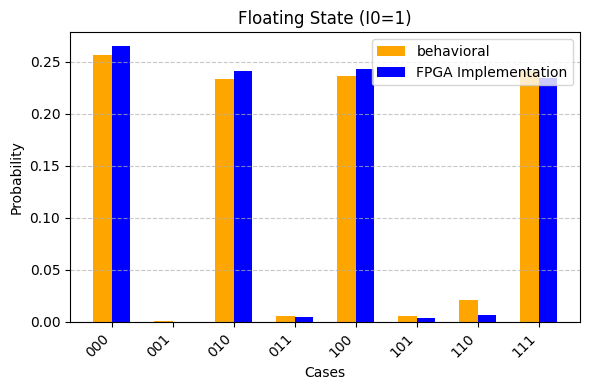

Saved plot: Plots/AND_gata_Behav_Imp_comparisonA=1,_B=1_(I0=1).png


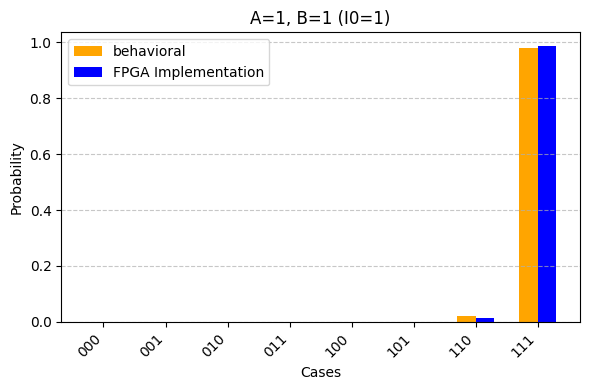

Saved plot: Plots/AND_gata_Behav_Imp_comparisonC=0_(I0=1).png


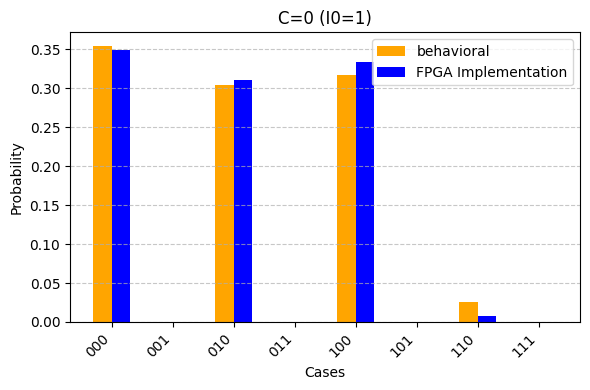

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Adjust the display width to show the entire DataFrame in one line
pd.set_option("display.width", 0)  # Automatically adjust width
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.expand_frame_repr", False)  # Prevent wrapping

# Define file paths
file_path_FPGA = "AND_gate_FPGA.csv"
file_path_FPGA_imp_combined = "FPGA Data/AND_gate_FPGA_imp_combined.csv"

# Load data
data_FPGA = pd.read_csv(file_path_FPGA, low_memory=False, dtype={'case': str})
data_FPGA_imp_combined = pd.read_csv(file_path_FPGA_imp_combined, low_memory=False, dtype={'case': str})

# Strip whitespace from column names
data_FPGA.columns = data_FPGA.columns.str.strip()
data_FPGA_imp_combined.columns = data_FPGA_imp_combined.columns.str.strip()

# Merge based on 'label' and 'case' columns, ensuring only cases available in AND_gate_FPGA_imp_combined are considered
merged_df = pd.merge(data_FPGA, data_FPGA_imp_combined, on=['label', 'case'], suffixes=('_Behav', '_Imp'))
print(merged_df)

# Define the specific labels to plot
labels_to_plot = ["Floating State (I0=1)", "A=1, B=1 (I0=1)", "C=0 (I0=1)"]

# Filter dataset to only include specified labels
filtered_df = merged_df[merged_df["label"].isin(labels_to_plot)]
print()
print(filtered_df)

# Iterate through each specified label and create a separate plot
for label in labels_to_plot:
    # Filter data for the current label and remove duplicates
    subset = filtered_df[filtered_df["label"] == label].sort_values(by="case").drop_duplicates()

    # Extract values
    cases = subset["case"]
    data_fpga = subset["normalized_count_FPGA_Behav"]
    data_fpga_imp_combined = subset["normalized_count_FPGA_Imp"]

    # Define x locations
    x = np.arange(len(cases))
    width = 0.3  # Width of bars

    # Create a new figure for each label
    plt.figure(figsize=(6, 4))

    # Plot bars using plt instead of ax
    plt.bar(x - width/2, data_fpga, width, label="behavioral", color="orange")
    plt.bar(x + width/2, data_fpga_imp_combined, width, label="FPGA Implementation", color="blue")

    # Formatting
    plt.title(f"{label}")
    plt.xlabel("Cases")
    plt.ylabel("Probability")
    plt.xticks(x, cases, rotation=45, ha="right")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show plot for the current label before moving to the next one
    plt.tight_layout()

    # Ensure the directory exists
    os.makedirs("Plots", exist_ok=True)

    # Generate a filename from the title
    filename = f"Plots/AND_gata_Behav_Imp_comparison{label.replace(' ', '_')}.png"
    plt.savefig(filename, dpi=300)
    print(f"Saved plot: {filename}")

    plt.show()
